<center><h2 style="text-decoration:"> Predictive Modeling for Store Sales at Corporation Favorita</h2></center>

##### <h3 style="text-decoration:">`Project Description`</h3>
<br>This project focuses on conducting a time series regression analysis to predict store sales at Corporation Favorita, a major grocery retailer based in Ecuador. The objective is to develop a robust predictive model that utilizes time-dependent data to forecast unit sales for various items across different Favorita stores. Leveraging regression techniques, the analysis aims to uncover relationships between sales and key factors such as promotions, oil prices, holidays, and other external variables. Through rigorous modeling and analysis of temporal patterns, the goal is to enhance the accuracy of sales predictions and provide valuable insights for optimizing business strategies.</br>

`Hypothesis:`

1. 
**Null Hypothesis (H0):** There is no significant difference in store sales between promotional and non-promotional periods.

**Alternative Hypothesis (H1):** Store sales significantly increase during promotional periods compared to non-promotional periods.

2. 
**Null Hypothesis (H0):** Oil prices have no effect on store sales at Corporation Favorita.

**Alternative Hypothesis (H1):** Fluctuations in oil prices impact store sales at Corporation Favorita.

3. 
**Null Hypothesis (H0):** Holidays and events do not influence the average sales of products at Corporation Favorita.

**Alternative Hypothesis (H1):** Holidays and events lead to significant changes in the average sales of products at Corporation Favorita.

4. 
**Null Hypothesis (H0):** The earthquake on April 16, 2016, did not affect store sales at Corporation Favorita.

**Alternative Hypothesis (H1):** Store sales were significantly impacted by the earthquake on April 16, 2016.

`Questions:`

1. How does the frequency and timing of promotions correlate with changes in sales volume?
2. What impact does oil price fluctuations have on store sales, and is there a lag effect?
3. How do store clusters, types, and locations correlate with sales performance, and are there any notable trends or patterns?

##### **Import necessary libraries**

In [1]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                          
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats import mannwhitneyu 
from scipy.stats import chi2_contingency
from scipy.stats import stats
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


In [106]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [107]:
# Using the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [108]:
# Sql query to get the data tables
query = "Select * FROM dbo.oil"
query2 = "Select * From dbo.holidays_events"
query3 = "Select * From dbo.stores"

Loading the Datasets

In [109]:
oil_dataset = pd.read_sql(query, connection)
holiday_dataset = pd.read_sql(query2, connection)
store_dataset = pd.read_sql(query3, connection)

In [46]:
oil_dataset.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [110]:
# changing the date datatype from object to date
oil_dataset['date'] = pd.to_datetime(oil_dataset['date'])

In [48]:
#Save file to csv
# oil_dataset.to_csv('DataSets\oil_dataset.csv', index=False)

In [97]:
holiday_dataset.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [98]:
# changing the date datatype from object to date
holiday_dataset['date'] = pd.to_datetime(holiday_dataset['date'])

In [50]:
#Save file to csv
# holiday_dataset.to_csv('DataSets\holiday_dataset.csv', index=False)

In [12]:
store_dataset.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [51]:
#Save file to csv
# store_dataset.to_csv('DataSets\store_dataset.csv', index=False)

In [63]:
test_dataset = pd.read_csv('Datasets/test.csv')
transaction_dataset = pd.read_csv('Datasets/transactions.csv')
train_dataset = pd.read_csv('Datasets/train.csv')

In [64]:
# changing the date datatype from object to date
test_dataset['date'] = pd.to_datetime(test_dataset['date'])
transaction_dataset['date'] = pd.to_datetime(transaction_dataset['date'])
train_dataset['date'] = pd.to_datetime(train_dataset['date'])

In [65]:
test_dataset.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [66]:
transaction_dataset.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [67]:
train_dataset.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


#### `EDA on Each Datasets`

`First Oil_Dataset`

In [113]:
oil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [112]:
# checking for missing values in the dataset
oil_dataset.isna().sum()

date           0
dcoilwtico    43
dtype: int64

- The Oil dataset have 43 null values in dcoilwtico column

In [111]:
#converting the date to date time
oil_dataset['date'] = pd.to_datetime(oil_dataset['date'], format='%Y-%m-%d')

In [114]:
# printing the missing values
oil_dataset[oil_dataset['dcoilwtico'].isnull()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


- Based on the output showing the dates with missing values in the 'dcoilwtico' column, we can observe that these missing values occur on specific dates across multiple years. Since our project involves time series analysis and the missing values seem to be sparse and intermittent, using a method such as backward fill (bfill) will be appropriate.

In [115]:
# filling missing values with the last known value in the time series. 
oil_dataset['dcoilwtico'].fillna(method='bfill', inplace=True)

In [118]:
oil_dataset.head()

,date,dcoilwtico
0,2013-01-01,93.139999
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [116]:
oil_dataset.isna().sum()

date          0
dcoilwtico    0
dtype: int64

- Now, there is no missing values in the oil dataset

In [152]:
# Summary Statistics
oil_dataset.describe()

,date,dcoilwtico
count,1218,1218.000000
mean,2015-05-02 12:00:00,67.673325
min,2013-01-01 00:00:00,26.190001
25%,2014-03-03 06:00:00,46.422500
50%,2015-05-02 12:00:00,53.184999
75%,2016-06-30 18:00:00,95.595001
max,2017-08-31 00:00:00,110.620003
std,NaN,25.637345


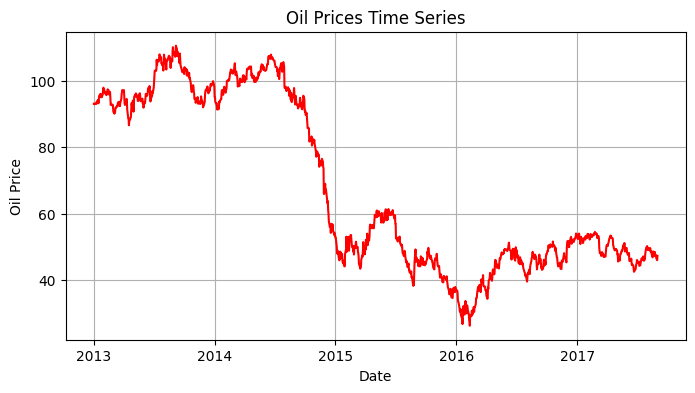

In [145]:
# Plot the oil dataset
plt.figure(figsize=(8, 4))
plt.plot(oil_dataset['date'], oil_dataset['dcoilwtico'], color='red')
plt.title('Oil Prices Time Series')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()

`Second Holiday dataset`

In [70]:
holiday_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [71]:
holiday_dataset.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

- The holiday_dataset does not have any missing values

In [147]:
# Summary Statistics
holiday_dataset.describe(include='all')

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


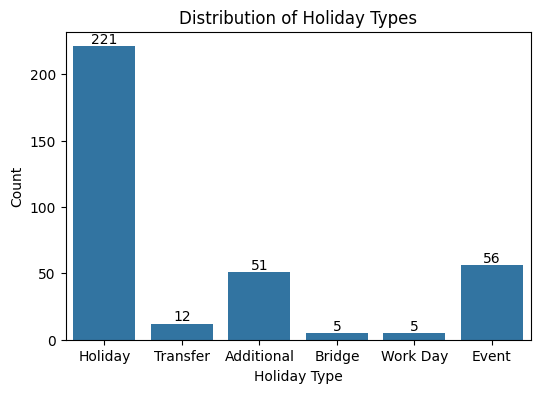

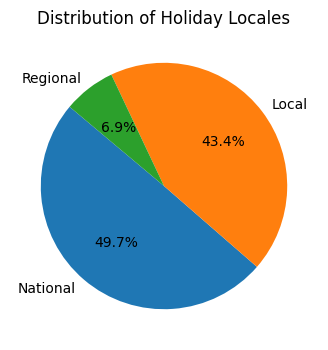

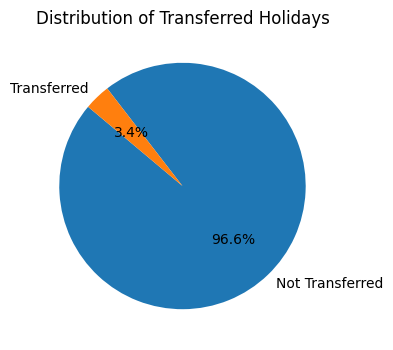

In [151]:
# Holiday Type Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=holiday_dataset, x='type')
plt.title('Distribution of Holiday Types')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')

plt.show()

# Locale Distribution
plt.figure(figsize=(6, 4))
locale_counts = holiday_dataset['locale'].value_counts()
plt.pie(locale_counts, labels=locale_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Holiday Locales')
plt.show()

# Transferred Holiday Analysis
plt.figure(figsize=(6, 4))
transferred_counts = holiday_dataset['transferred'].value_counts()
plt.pie(transferred_counts, labels=['Not Transferred', 'Transferred'], autopct='%1.1f%%', startangle=140,)
plt.title('Distribution of Transferred Holidays')
plt.show()

`Third Store Dataset`

In [72]:
store_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [73]:
store_dataset.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

- The store_dataset does not have any missing values

`Four test Dataset`

In [74]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [75]:
test_dataset.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

- The test dataset does not have any missing values

`Five transactions dataset`

In [76]:
transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [77]:
transaction_dataset.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

- The transaction dataset does not have any missing values

`Six train Dataset`

In [78]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [79]:
train_dataset.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

- The train dataset does not have any missing values